# Subject: Data Science Foundation

## Session 13 - Correlation in Python.

### Exercise 3 -  Calculating Correlation in Pandas


We will be using a dataset "Iris". Calculate the Pearson correlation of sepal length in cm, sepal width in cm, petal length in cm and petal width in cm.

In [11]:
import pandas as pd
import numpy as np
from sklearn import datasets, linear_model
import seaborn as sns
import matplotlib.pyplot as plt
%matplotlib inline
iris = datasets.load_iris()

In [2]:
print (iris.DESCR)

Iris Plants Database

Notes
-----
Data Set Characteristics:
    :Number of Instances: 150 (50 in each of three classes)
    :Number of Attributes: 4 numeric, predictive attributes and the class
    :Attribute Information:
        - sepal length in cm
        - sepal width in cm
        - petal length in cm
        - petal width in cm
        - class:
                - Iris-Setosa
                - Iris-Versicolour
                - Iris-Virginica
    :Summary Statistics:

    ============== ==== ==== ======= ===== ====================
                    Min  Max   Mean    SD   Class Correlation
    ============== ==== ==== ======= ===== ====================
    sepal length:   4.3  7.9   5.84   0.83    0.7826
    sepal width:    2.0  4.4   3.05   0.43   -0.4194
    petal length:   1.0  6.9   3.76   1.76    0.9490  (high!)
    petal width:    0.1  2.5   1.20  0.76     0.9565  (high!)
    ============== ==== ==== ======= ===== ====================

    :Missing Attribute Values: None
  

In [3]:
df_iris = pd.DataFrame(iris.data, columns=iris.feature_names)
df_iris.head()

,sepal length (cm),sepal width (cm),petal length (cm),petal width (cm)
0,5.1,3.5,1.4,0.2
1,4.9,3.0,1.4,0.2
2,4.7,3.2,1.3,0.2
3,4.6,3.1,1.5,0.2
4,5.0,3.6,1.4,0.2


In [5]:
# pairwise correlation
# el drop hace que no se usen esas columnas
df_iris.corr(method='spearman')

,sepal length (cm),sepal width (cm),petal length (cm),petal width (cm)
sepal length (cm),1.000000,-0.159457,0.881386,0.834421
sepal width (cm),-0.159457,1.000000,-0.303421,-0.277511
petal length (cm),0.881386,-0.303421,1.000000,0.936003
petal width (cm),0.834421,-0.277511,0.936003,1.000000


In [8]:
df_iris.corr(method='pearson').style.format("{:.2}").background_gradient(cmap=plt.get_cmap('coolwarm'), axis=1)

,sepal length (cm),sepal width (cm),petal length (cm),petal width (cm)
sepal length (cm),1.0,-0.11,0.87,0.82
sepal width (cm),-0.11,1.0,-0.42,-0.36
petal length (cm),0.87,-0.42,1.0,0.96
petal width (cm),0.82,-0.36,0.96,1.0


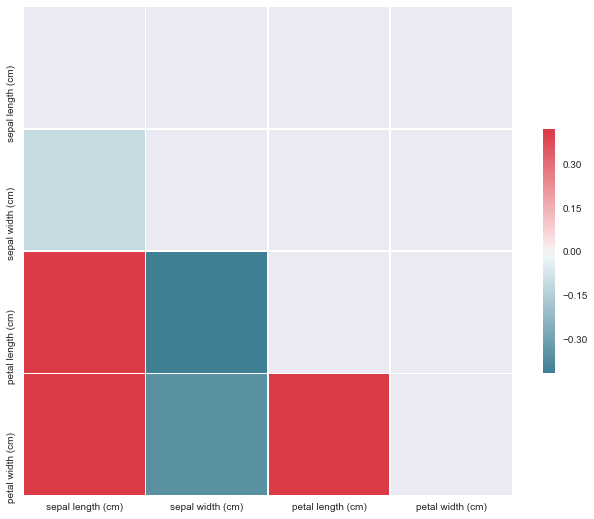

In [12]:
# Compute the correlation matrix

corr = df_iris.corr(method='pearson')

# Generate a mask for the upper triangle
mask = np.zeros_like(corr, dtype=np.bool)
mask[np.triu_indices_from(mask)] = True

# Set up the matplotlib figure
f, ax = plt.subplots(figsize=(11, 9))

# Generate a custom diverging colormap
cmap = sns.diverging_palette(220, 10, as_cmap=True)

# Draw the heatmap with the mask and correct aspect ratio
sns.heatmap(corr, mask=mask, cmap=cmap, vmax=.3, center=0,
            square=True, linewidths=.5, cbar_kws={"shrink": .5})

# Conclusion: 

There is an extremely high correlation between all variables with the exaption of the sepal width, which has no correlation at all with the other characteristics.